# Making prettier (and more impactful) plots

Making prettier plots is part matter-of-taste, part an appreciation for optical perception. These days, there are a number of things you can do to make prettier plots. The guiding philosophy for these bits of advice is that it's better to start with little, and add more elements to the plot only if they actually add information (see the work of Edward Tufte).

In [1]:
# we'll use the pythonic pyplot interface
import matplotlib.pyplot as plt

# necessary for the notebook to render the plots inline
%matplotlib inline                     

In [2]:
import numpy as np
np.random.seed(42)

In [3]:
x = np.linspace(0, 40, 1000) 
y = np.sin(np.linspace(0, 10*np.pi, 1000))
y += np.random.randn(len(x))

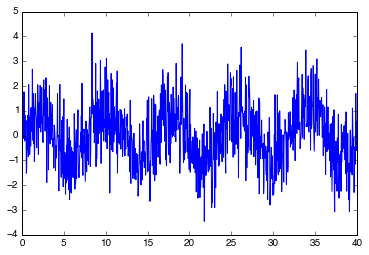

In [4]:
plt.plot(x, y)

The default plots created with matplotlib aren't bad, but they do have elements that are, at best, unnecessary. At worst, these elements detract from the display of quantitative information. We want to change this. First, let's change matplotlib's style with a built-in style sheet.

In [5]:
# this gives us a style and color palette similar to ggplot2
plt.style.use('ggplot')

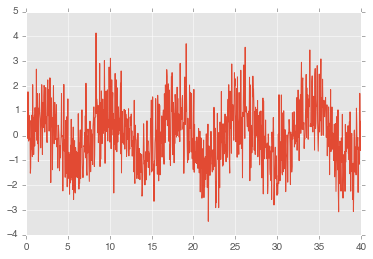

In [6]:
plt.plot(x, y)

This produces something a bit more pleasing to the eye, with what probably amounts to better coloration. It replaced the box with a grid, however. Although this is useful for some plots, in particular panels of plots in which one needs to compare across different plots, it is often just unnecessary noise.

Using [seaborn](http://stanford.edu/~mwaskom/software/seaborn/) can help with this. We'll import seaborn's helper functions without importing its style:

In [7]:
# import seaborn's helpful functions without applying its style
import seaborn.apionly as sns

In [11]:
# importing seaborn can sometimes reset matplotlib's style to default
plt.style.use('ggplot')

In [13]:
# this will remove the noisy grids the 'ggplot' style gives
sns.set_style('ticks')

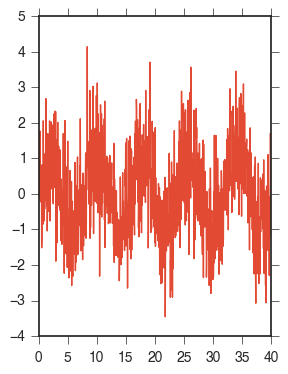

In [14]:
plt.plot(x, y)

It almost looks like we took two steps forward and one step back: now we have a box again. But seaborn provides a useful function for removing axis lines: `despine`.

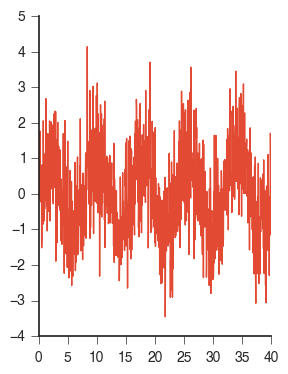

In [15]:
plt.plot(x, y)
sns.despine()

We can also go further, moving the axes a bit so they distract even less from the data, which should be front-and-center.

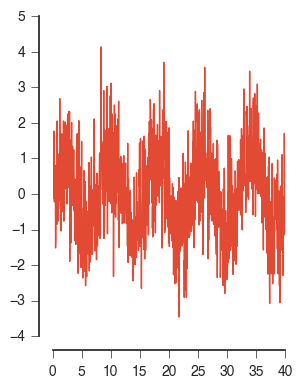

In [16]:
plt.plot(x, y)
sns.despine(offset=10)

Now let's do some refining. Figures for exploratory work can be any size that's convenient, but when making figures for a publication, you must consider the real size of the figure in the final printed form. Considering a page in the U.S. is typically 8.5 x 11 inches, a typical figure should be no more than 4 inches wide to fit in a single column of the page. We can adjust figure sizes by giving matplotlib a bit more detail:

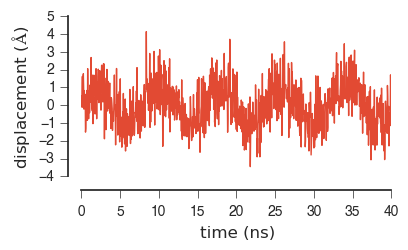

In [19]:
fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot(1,1,1)

ax.plot(x, y)
sns.despine(offset=10, ax=ax)

# let's add some axes labels to boot
ax.set_ylabel(r'displacement ($\AA$)')
ax.set_xlabel('time (ns)')

We added some axes labels, too. Because this is a timeseries, we deliberately made the height of the figure less than the width. This is because timeseries are difficult to interpret when the variations with time are smashed together. Tufte's general rule is that no line in the timeseries be greater than 45$\deg$; we would have a hard time doing that here with such noisy data, but going wider than tall is a step in the right direction.

## Plotting to files

We can save figures in a variety of formats. It's useful to save a version as a PDF so that it can be postprocessed using vector graphics tools like Inkscape and Adobe Illustrator, but because vector graphics must be rendered by the viewer on load, it's useful to also write out a PNG. 

PNGs are raster graphics: they are just a matrix of pixels with four components (red, green, blue, and alpha (transparency)). This means they are quick to render with your favorite viewer, even if the plot originally had hundreds of thousands of points. However, they are not so great for making posters and final publication-quality figures, since they cannot be scaled to any size like vector graphics.

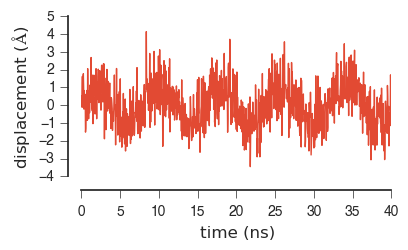

In [39]:
fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot(1,1,1)

ax.plot(x, y)
sns.despine(offset=10, ax=ax)

# let's add some axes labels to boot
ax.set_ylabel(r'displacement ($\AA$)')
ax.set_xlabel('time (ns)')

fig.savefig('testfigure.pdf')
fig.savefig('testfigure.png', dpi=300)

We can view the resulting PNG directly:

In [40]:
from IPython.display import Image

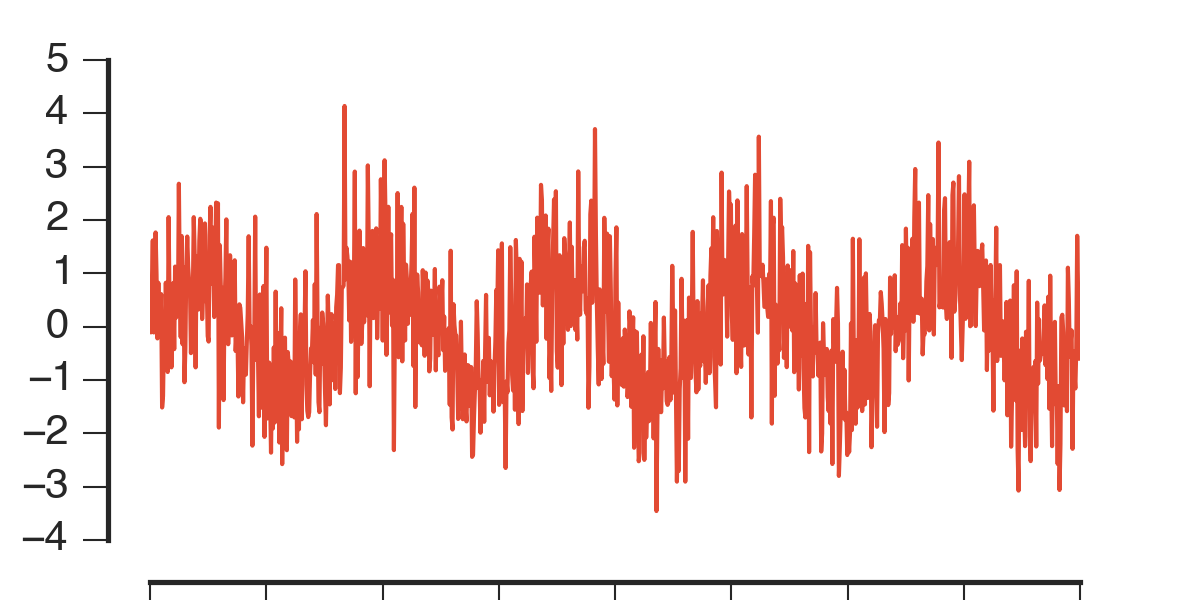

In [41]:
Image(filename='testfigure.png')

Woah...something's wrong. The figure doesn't fit in the frame! This is because the figure elements were adjusted after the figure object was created, and so some of these elements, including the axis labels, are beyond the figure's edges. We can usually fix this with a call to `plt.tight_layout` to ensure everything fits in the plots we write out.

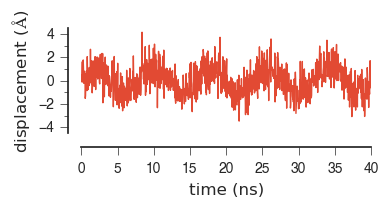

In [42]:
fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot(1,1,1)

ax.plot(x, y)
sns.despine(offset=10, ax=ax)

# let's add some axes labels to boot
ax.set_ylabel(r'displacement ($\AA$)')
ax.set_xlabel('time (ns)')

# and now we'll also refine the y-axis ticks a bit
ax.set_ylim(-4.5, 4.5)
ax.set_yticks(np.linspace(-4, 4, 5))
ax.set_yticks(np.linspace(-3, 3, 4), minor=True)

plt.tight_layout()

fig.savefig('testfigure.pdf')
fig.savefig('testfigure.png', dpi=300)

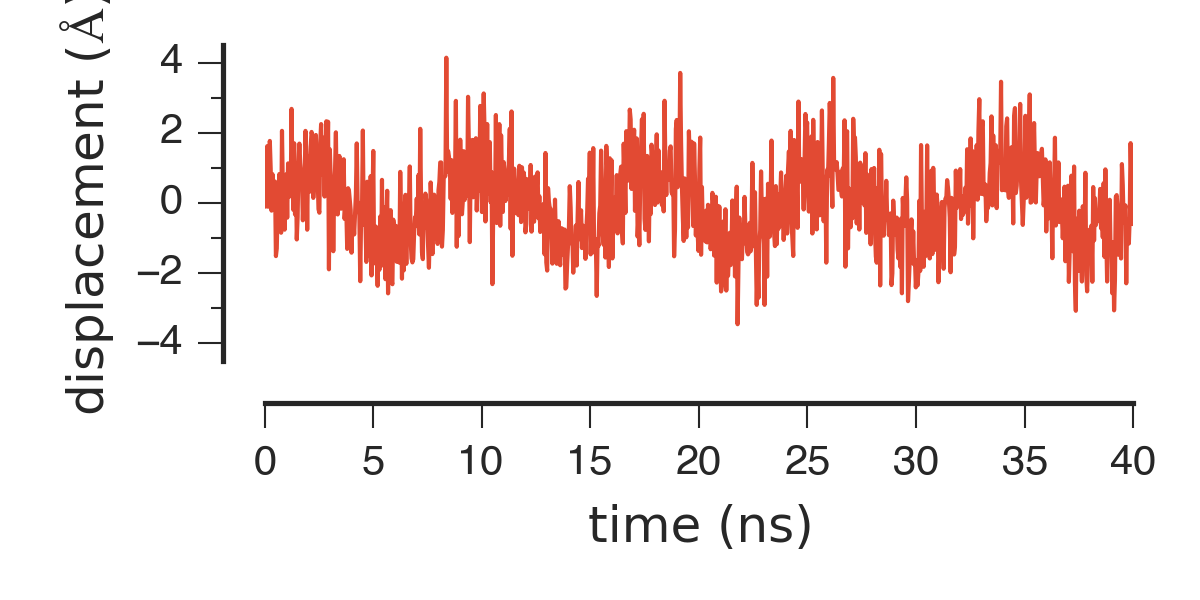

In [43]:
Image(filename='testfigure.png')

Okay...better. But it looks like the labels are a bit too big to make these dimensions work well. We can adjust these directly by changing matplotlib's settings. These are the same settings you might have set defaults for in your matplotlibrc file.

In [45]:
plt.rcParams['font.size'] = 8          # we can override matplotlib's settings; for example, changing the font size

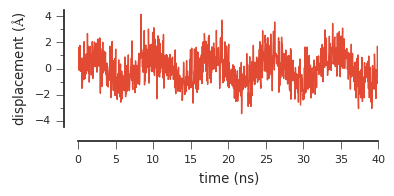

In [46]:
fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot(1,1,1)

ax.plot(x, y)
sns.despine(offset=10, ax=ax)

# let's add some axes labels to boot
ax.set_ylabel(r'displacement ($\AA$)')
ax.set_xlabel('time (ns)')

# and now we'll also refine the y-axis ticks a bit
ax.set_ylim(-4.5, 4.5)
ax.set_yticks(np.linspace(-4, 4, 5))
ax.set_yticks(np.linspace(-3, 3, 4), minor=True)

plt.tight_layout()

fig.savefig('testfigure.pdf')
fig.savefig('testfigure.png', dpi=300)

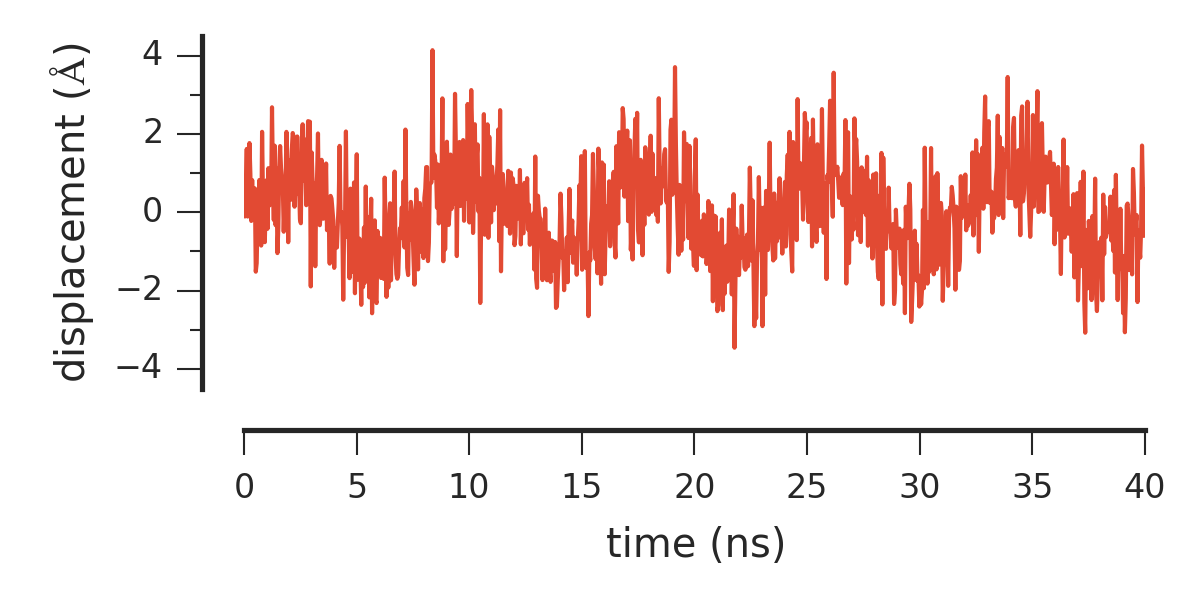

In [47]:
Image(filename='testfigure.png')

Much better!

## Going further

Because we know this is an oscillating function, it might make sense to also plot a histogram of its values to get a sense of their distribution. We can accomplish this in one figure using subplots defined with a ``GridSpec`` object. There are many ways of defining the spatial extent of axes within a figure, but for this case this is probably the easiest.

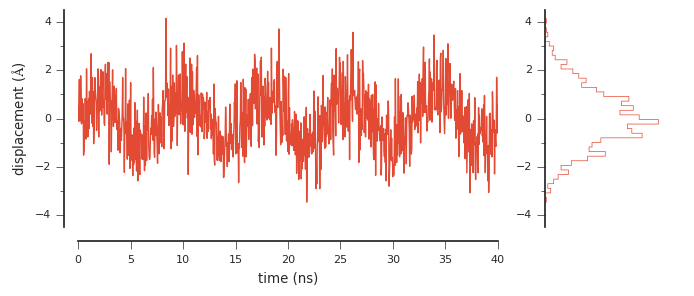

In [62]:
from matplotlib import gridspec

fig = plt.figure(figsize=(7, 3))
gs = gridspec.GridSpec(1, 2, width_ratios=[3,1] )

# plot the timeseries
ax0 = plt.subplot(gs[0])
ax0.plot(x, y)

# let's add some axes labels to boot
ax0.set_ylabel(r'displacement ($\AA$)')
ax0.set_xlabel('time (ns)')

# and now we'll also refine the y-axis ticks a bit
ax0.set_ylim(-4.5, 4.5)
ax0.set_yticks(np.linspace(-4, 4, 5))
ax0.set_yticks(np.linspace(-3, 3, 4), minor=True)

# plot the distribution
ax1 = plt.subplot(gs[1])
ax1.hist(y, histtype='step', bins=40, normed=True, orientation='horizontal')

# this will remove the grid and the ticks on the x-axis
ax1.set_xticks([])
ax1.grid(False)

ax1.set_xlim((0,.5))
ax1.set_ylim(-4.5, 4.5)
ax1.set_yticks(np.linspace(-3, 3, 4), minor=True)

sns.despine(ax=fig.axes[0], offset=10)
sns.despine(ax=fig.axes[1], bottom=True)

plt.tight_layout()

Don't like the color? We can use seaborn to get at different colors in the color palette:

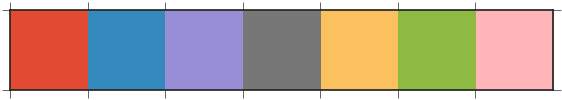

In [63]:
sns.palplot(sns.color_palette())

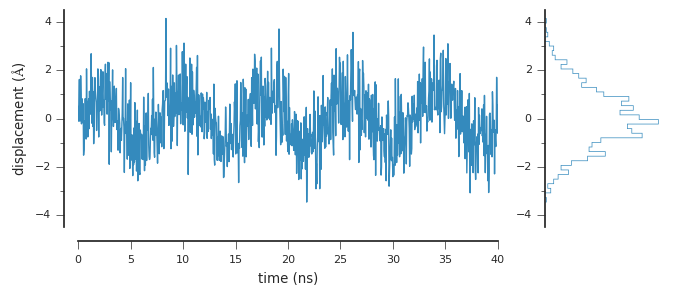

In [66]:
from matplotlib import gridspec

fig = plt.figure(figsize=(7, 3))
gs = gridspec.GridSpec(1, 2, width_ratios=[3,1] )

# plot the timeseries
ax0 = plt.subplot(gs[0])
ax0.plot(x, y, color=sns.color_palette()[1])

# let's add some axes labels to boot
ax0.set_ylabel(r'displacement ($\AA$)')
ax0.set_xlabel('time (ns)')

# and now we'll also refine the y-axis ticks a bit
ax0.set_ylim(-4.5, 4.5)
ax0.set_yticks(np.linspace(-4, 4, 5))
ax0.set_yticks(np.linspace(-3, 3, 4), minor=True)

# plot the distribution
ax1 = plt.subplot(gs[1])
ax1.hist(y, histtype='step', bins=40, normed=True, orientation='horizontal', color=sns.color_palette()[1])

# this will remove the grid and the ticks on the x-axis
ax1.set_xticks([])
ax1.grid(False)

ax1.set_xlim((0,.5))
ax1.set_ylim(-4.5, 4.5)
ax1.set_yticks(np.linspace(-3, 3, 4), minor=True)

sns.despine(ax=fig.axes[0], offset=10)
sns.despine(ax=fig.axes[1], bottom=True)

plt.tight_layout()